# Recurrent Neural Network

## Part 1 - Data Preprocessing

### Importing the libraries

In [58]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the data set and splitting it into train & test set

In [59]:
dataset = pd.read_csv('bitcoin_price_Training.csv')
training_set = dataset.iloc[:, 1:2].values
test_set = training_set[1:300]
training_set = training_set[300:len(training_set)]

### Feature Scaling

In [60]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

### Creating a data structure with 60 timesteps and 1 output

In [61]:
X_train = []
y_train = []
for i in range(60, 1262):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

### Reshaping

In [62]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

## Part 2 - Building and Training the RNN

### Importing the Keras libraries and packages

In [63]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

### Initialising the RNN

In [64]:
regressor = Sequential()

### Adding the first LSTM layer and some Dropout regularisation

In [65]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

### Adding a second LSTM layer and some Dropout regularisation

In [66]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a third LSTM layer and some Dropout regularisation

In [67]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a fourth LSTM layer and some Dropout regularisation

In [68]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

### Adding the output layer

In [69]:
regressor.add(Dense(units = 1))

### Compiling the RNN

In [70]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

### Fitting the RNN to the Training set

In [71]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 9s 83ms/step - loss: 0.0186
Epoch 2/100
38/38 [==============================] - 3s 81ms/step - loss: 0.0083
Epoch 3/100
38/38 [==============================] - 3s 82ms/step - loss: 0.0058
Epoch 4/100
38/38 [==============================] - 3s 87ms/step - loss: 0.0055
Epoch 5/100
38/38 [==============================] - 3s 80ms/step - loss: 0.0049
Epoch 6/100
38/38 [==============================] - 3s 80ms/step - loss: 0.0042
Epoch 7/100
38/38 [==============================] - 3s 81ms/step - loss: 0.0034
Epoch 8/100
38/38 [==============================] - 3s 79ms/step - loss: 0.0031
Epoch 9/100
38/38 [==============================] - 3s 80ms/step - loss: 0.0029
Epoch 10/100
38/38 [==============================] - 3s 81ms/step - loss: 0.0030
Epoch 11/100
38/38 [==============================] - 3s 80ms/step - loss: 0.0025
Epoch 12/100
38/38 [==============================] - 3s 82ms/step - loss: 0.0029
Epoch 13/100
38/38 [=====

## Part 3 - Making the predictions and visualising the results

### Getting the predicted stock price of for the Test set

In [72]:
real_stock_price = test_set

inputs = test_set
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 300):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)


8/8 [==============================] - 1s 21ms/step


In [73]:
# Shifting the predicted values, and addig some 0-es to match up the real data
temp_stack = np.zeros((60,1))
ts_flat = temp_stack.flatten()
psp_flat = predicted_stock_price.flatten()
temp = np.concatenate([ts_flat, psp_flat])
temp = np.reshape(temp, (len(temp), 1))
predicted_stock_price = temp

### Visualising the results

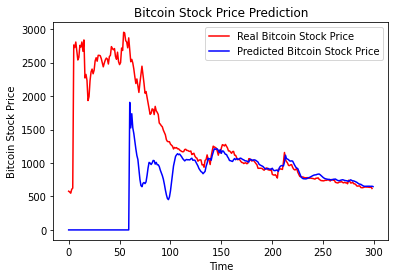

In [74]:
plt.plot(real_stock_price, color = 'red', label = 'Real Bitcoin Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Bitcoin Stock Price')
plt.title('Bitcoin Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Bitcoin Stock Price')
plt.legend()
plt.show()